In [32]:
import shutil
import os
import re
import cv2
import splitter
import pandas as pd
import collections

In [25]:
import numpy as np
from six.moves import range

In [34]:
splitter = re.compile("\s+")
base_path = '/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img'

In [87]:
attr_file = "/Users/manishashivshette/Documents/ManishaStudies/CMPE295B/TextureModel/list_attr_clothescopy.csv"


In [88]:
df = pd.read_csv(attr_file)
df.head()    

,attribute_name,attribute_type
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1


In [89]:

#extract texture related attributes
df_texture = df[df['attribute_type']==1]

In [90]:
print(df_texture)
df_texture.info()

           attribute_name    attribute_type
1          abstract                       1
2          abstract chevron               1
3    abstract chevron print               1
4          abstract diamond               1
5          abstract floral                1
6     abstract floral print               1
7          abstract geo                   1
8        abstract geo print               1
9          abstract paisley               1
10         abstract pattern               1
11         abstract print                 1
12         abstract printed               1
13         abstract stripe                1
18         animal                         1
19         animal print                   1
39         bandana                        1
40         bandana print                  1
42         baroque                        1
43         baroque print                  1
73         bird                           1
74         bird print                     1
85         botanical            

In [91]:
df_texture['attribute_name  ']=df_texture['attribute_name  '].str.strip()

/Users/manishashivshette/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
texture_dict = dict(zip(df_texture['attribute_name  '], df_texture.attribute_type))

In [93]:
texture_dict

{'abstract': 1,
 'abstract chevron': 1,
 'abstract chevron print': 1,
 'abstract diamond': 1,
 'abstract floral': 1,
 'abstract floral print': 1,
 'abstract geo': 1,
 'abstract geo print': 1,
 'abstract paisley': 1,
 'abstract pattern': 1,
 'abstract print': 1,
 'abstract printed': 1,
 'abstract stripe': 1,
 'animal': 1,
 'animal print': 1,
 'bandana': 1,
 'bandana print': 1,
 'baroque': 1,
 'baroque print': 1,
 'bird': 1,
 'bird print': 1,
 'botanical': 1,
 'botanical print': 1,
 'boxy striped': 1,
 'breton': 1,
 'breton stripe': 1,
 'brushstroke': 1,
 'brushstroke print': 1,
 'butterfly': 1,
 'butterfly print': 1,
 'camo': 1,
 'camouflage': 1,
 'checked': 1,
 'checkered': 1,
 'cheetah': 1,
 'chevron': 1,
 'chevron print': 1,
 'chiffon floral': 1,
 'circle': 1,
 'clashist': 1,
 'classic striped': 1,
 'colorblock': 1,
 'colorblocked': 1,
 'crochet floral': 1,
 'daisy': 1,
 'daisy print': 1,
 'diamond': 1,
 'diamond print': 1,
 'ditsy': 1,
 'ditsy floral': 1,
 'ditsy floral print': 1,
 

In [102]:
def process_folders():
    # Read the relevant annotation file and preprocess it
    # Assumed that the annotation files are under '<project folder>/data/anno' path
    partitition_file_path = "/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/Eval/list_eval_partition.txt"
    with open(partitition_file_path, 'r') as eval_partition_file:
        list_eval_partition = [line.rstrip('\n') for line in eval_partition_file][2:]
        list_eval_partition = [splitter.split(line) for line in list_eval_partition]
        list_all =[]
        for v in list_eval_partition:
            attribute = (v[0].split('/')[1].split('_')[0]).lower()
            
            if attribute in texture_dict:
                print(attribute)
                texture_dict[attribute]+=1
                list_all.append((v[0][4:],attribute , v[1]))
    print(list_all[0:5])
    print(len(list_all))
    count =0
    for element in list_all:
        if not os.path.exists(os.path.join(base_path, element[2])):
            os.mkdir(os.path.join(base_path, element[2]))
        if not os.path.exists(os.path.join(os.path.join(base_path, element[2]), element[1])):
            os.mkdir(os.path.join(os.path.join(base_path, element[2]), element[1]))
        if not os.path.exists(os.path.join(os.path.join(os.path.join(os.path.join(base_path, element[2]), element[1])),
                              element[0].split('/')[0])):
            print(os.path.join(os.path.join(os.path.join(os.path.join(base_path, element[2]), element[1])),
                     element[0].split('/')[0]))
            os.mkdir(os.path.join(os.path.join(os.path.join(os.path.join(base_path, element[2]), element[1])),
                     element[0].split('/')[0]))
        try:
            
            shutil.copyfile(os.path.join(base_path, element[0]),
                os.path.join(os.path.join(os.path.join(base_path, element[2]), element[1]), element[0]))
        except:
            count+=1
            #print(os.path.join(base_path, element[0]))
            #print("one file not found")
    print("file not found count:",count) 

In [103]:
process_folders()

southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern

watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
watercolor
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract

dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted
dotted

floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral

abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
a

striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
breton
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
st

striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped


tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal

chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron
chevron


colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked

floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral

abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo

marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled

nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
bird
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract


marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
mandala
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marle

colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked
colorblocked

flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
flower
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral

diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
diamond
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy
ditsy


tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal
tribal

mixed
mixed
mixed
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
nautical
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
stri

daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
dais

abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
a

daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
dais

abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
abstract
a

floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral

floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral

floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
floral
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo
geo


striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped


striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped
striped


southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
southwestern
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticated
sophisticate

marble
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled
marled

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/southwestern/Southwestern_Print_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/southwestern/Southwestern_Print_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/speckled/Speckled_Slub_Knit_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/speckled/Speckled_Slub_Knit_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/speckled/Speckled_Slub_Knit_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/stripe/Stripe_Print_Surplice_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/stripe/Stripe_Print_Surplice_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/stripe/Stripe_Print_Surplice_Blous

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Print_Lace-Paneled_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Print_Lace-Paneled_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Print_Lace-Paneled_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Print_Peasant_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Print_Peasant_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Print_Peasant_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/colorblocked/Colorblocked_Tribal_Print_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/i

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Printed_Side-Tie_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Printed_Side-Tie_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Printed_Side-Tie_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_and_Bird_Print_Blazer
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_and_Bird_Print_Blazer
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_and_Bird_Print_Blazer
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Daisy_Print_Blouse
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Daisy_Print

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/southwestern/Southwestern_Print_Muscle_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/southwestern/Southwestern_Print_Muscle_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/southwestern/Southwestern_Print_Muscle_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/southwestern/Southwestern_Print_Pocket_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/southwestern/Southwestern_Print_Pocket_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/southwestern/Southwestern_Print_Pocket_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/southwestern/Southwestern_Print_Pocket_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Bow-Back_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/striped/Striped_Bow-Back_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Bow-Back_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Boxy_Knit_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Boxy_Knit_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/striped/Striped_Boxy_Knit_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Boxy_Sweater
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Boxy_Sweater
/Users/manishashivshette/Documents/ManishaStudies

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Hot_Dog_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Hot_Dog_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/striped/Striped_Hot_Dog_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/striped/Striped_Knit_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Knit_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Knit_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Knit_Cropped_Hoodie
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Knit_Cropped_Hoodie
/Users/manishashivshette/Documents/Manish

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Shaggy_Knit_Sweater
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Shawl_Collar_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/striped/Striped_Shawl_Collar_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Shawl_Collar_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Slub_Knit_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Slub_Knit_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/striped/Striped_Slub_Knit_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Slub_Knit_Tee
/Users/manishas

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/tribal/Tribal_Patterned_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/tribal/Tribal_Patterned_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/tribal/Tribal_Patterned_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/tribal/Tribal_Patterned_Jacket
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/tribal/Tribal_Patterned_Jacket
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/tribal/Tribal_Patterned_Jacket
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/tribal/Tribal_Print_Boxy_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/tribal/Tribal_Print_Boxy_Tank
/Users/manishashivshette/Documents/

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/varsity-striped/Varsity-Striped_Dolphin_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/varsity-striped/Varsity-Striped_Dolphin_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/varsity-striped/Varsity-Striped_Dolphin_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/varsity-striped/Varsity-Striped_Heathered_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/varsity-striped/Varsity-Striped_Heathered_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/varsity-striped/Varsity-Striped_Heathered_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/varsity-striped/Varsity-Striped_Linen_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Plaid_Printed_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Plaid_Printed_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Plaid_Printed_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/chevron/Chevron_Cutout_Back_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/chevron/Chevron_Cutout_Back_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/chevron/Chevron_Cutout_Back_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/chevron/Chevron_Floral_Print_Top
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/chevron/Chevron_Floral_Print_Top
/Us

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/colorblock/Colorblock_Athletic_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/colorblock/Colorblock_Athletic_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/colorblock/Colorblock_Athletic_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/colorblock/Colorblock_Pocket_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/colorblock/Colorblock_Pocket_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/colorblock/Colorblock_Pocket_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/colorblock/Colorblock_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/colorblock/Colorblock_Tee
/Users/manishashivshette/D

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/colorblocked/Colorblocked_Toujours_la_V&ocirc;tre_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/colorblocked/Colorblocked_Toujours_la_V&ocirc;tre_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/colorblocked/Colorblocked_Toujours_la_V&ocirc;tre_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/colorblocked/Colorblocked_Track_Jacket
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/colorblocked/Colorblocked_Track_Jacket
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/colorblocked/Colorblocked_Track_Jacket
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Print_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fa

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/daisy/Daisy_Print_Muscle_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Zigzag_Top
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Zigzag_Top
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Zigzag_Top
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Zippered_Crop_Top
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Zippered_Crop_Top
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Zippered_Crop_Top
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/diamond/Diamond_Open-Knit_Cardigan
/Users/manishashivshette/Docum

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Lace_Bomber_Jacket
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Lace_Bomber_Jacket
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Lace_Bomber_Jacket
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Lace_Maxi_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Lace_Maxi_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Lace_Maxi_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Lace_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Lace_Tank
/Users/manishashivshette/Documents/Manisha

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/bandana/Bandana_Print_Crop_Top
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/bandana/Bandana_Print_Crop_Top
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/bandana/Bandana_Print_Crop_Top
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/bandana/Bandana_Print_Layered_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/bandana/Bandana_Print_Layered_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/bandana/Bandana_Print_Layered_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/bandana/Bandana_Print_Muscle_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/bandana/Bandana_Print_Muscle_Tee
/Users/manishashivshette/D

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/leaf/Leaf_Print_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/leaf/Leaf_Print_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/leaf/Leaf_Print_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/leaf/Leaf_Print-Sleeve_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/leaf/Leaf_Print-Sleeve_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/leaf/Leaf_Print-Sleeve_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/leave/Leave_Me_Alone_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/leave/Leave_Me_Alone_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/leave/Le

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/marled/Marled_Cutout_Back_Sweater
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/marled/Marled_Dolman_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/marled/Marled_Dolman_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/marled/Marled_Dolman_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/marled/Marled_Dolman-Sleeve_Hoodie
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/marled/Marled_Dolman-Sleeve_Hoodie
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/marled/Marled_Dolman-Sleeve_Hoodie
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/marled/Marled_Dolphin_Hem_Sweater
/Users/manishashivshette/Documents/Mani

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/marled/Marled_Knit_Zippered_Hoodie
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/marled/Marled_Knit_Zippered_Hoodie
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/marled/Marled_Knit_Zippered_Hoodie
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/marled/Marled_Longline_Hooded_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/marled/Marled_Longline_Hooded_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/marled/Marled_Longline_Hooded_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/marled/Marled_Longline_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/marled/Marled_Longline_Tee
/Users/mani

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/mixed/Mixed_Geo_Print_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/mixed/Mixed_Geo_Print_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/mixed/Mixed_Geo_Print_Tee
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/mixed/Mixed_Knit_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/mixed/Mixed_Knit_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/mixed/Mixed_Knit_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/mixed/Mixed_Knit_Cowl_Neck_Sweater
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/mixed/Mixed_Knit_Cowl_Neck_Sweater
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/dee

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/paisley/Paisley_Dolman_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/paisley/Paisley_Dolman_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/paisley/Paisley_Dolman_Cardigan
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/paisley/Paisley_Print_Buttoned_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/paisley/Paisley_Print_Buttoned_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/paisley/Paisley_Print_Buttoned_Tank
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/paisley/Paisley_Print_Strappy_Halter
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/paisley/Paisley_Print_Strappy_Halter
/Users/man

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/medallion/Medallion_Print_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/medallion/Medallion_Print_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/medallion/Medallion_Print_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/marled/Marled_Terrycloth_PJ_Sweatpants
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/marled/Marled_Terrycloth_PJ_Sweatpants
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/marled/Marled_Terrycloth_PJ_Sweatpants
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/marled/Marled_Tuxedo-Stripe_Joggers
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/marled/Marled_Tuxedo-Stripe_Joggers

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/linen/Linen_Capri_Joggers
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/linen/Linen_Capri_Joggers
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/linen/Linen_Capri_Joggers
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/leopard/Leopard_Print_Cutoff_Sweatshorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/leopard/Leopard_Print_Cutoff_Sweatshorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/leopard/Leopard_Print_Cutoff_Sweatshorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/leopard/Leopard_Print_Joggers
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/leopard/Leopard_Print_Joggers
/Users/manishashivshette/Do

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/colorblocked/Colorblocked_Workout_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/colorblocked/Colorblocked_Workout_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/colorblocked/Colorblocked_Workout_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/colorblocked/Colorblocked_Yoga_Capri_Leggings
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/colorblocked/Colorblocked_Yoga_Capri_Leggings
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/colorblocked/Colorblocked_Yoga_Capri_Leggings
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/colorblocked/Colorblocked_Yoga_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-datas

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Print_Joggers
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Print_Maxi_Skirt
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Print_Maxi_Skirt
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Print_Maxi_Skirt
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Print_Performance_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Print_Performance_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Print_Performance_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Pri

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/bandana/Bandana_Print_Sweatshorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/baroque/Baroque_Lace_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/baroque/Baroque_Lace_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/baroque/Baroque_Lace_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/baroque/Baroque_Mesh_Overlay_Skirt
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/baroque/Baroque_Mesh_Overlay_Skirt
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/baroque/Baroque_Mesh_Overlay_Skirt
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Diamond_Print_Shorts
/Users/manishashivshette/

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Print_Crochet_Hem_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Print_Crochet_Hem_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Print_Crochet_Hem_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Print_Culottes
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Print_Culottes
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Print_Culottes
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Print_Drawstring_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Print_Drawstring_Shorts
/Users/

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/ditsy/Ditsy_Floral_PJ_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/ditsy/Ditsy_Floral_PJ_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/ditsy/Ditsy_Floral_PJ_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/ditsy/Ditsy_Floral_Print_Leggings
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/ditsy/Ditsy_Floral_Print_Leggings
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/ditsy/Ditsy_Floral_Print_Leggings
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/ditsy/Ditsy_Floral_Skater_Skirt
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/ditsy/Ditsy_Floral_Skater_Skirt
/Users/manishashivshette/Documents/

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/geo/Geo_Moment_High-Waisted_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/geo/Geo_Print_Capri_Workout_Leggings
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/geo/Geo_Print_Capri_Workout_Leggings
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/geo/Geo_Print_Capri_Workout_Leggings
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/folk/Folk_Print_Linen_Skirt
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/folk/Folk_Print_Linen_Skirt
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/folk/Folk_Print_Linen_Skirt
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/varsity-striped/Varsity-Striped_Miami_Sweatpants
/Users/m

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/tribal/Tribal_Print_Linen_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/tribal/Tribal_Inspired_Joggers
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/tribal/Tribal_Inspired_Joggers
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/tribal/Tribal_Inspired_Joggers
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/tribal/Tribal_Pattern_Sequin_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/tribal/Tribal_Pattern_Sequin_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/tribal/Tribal_Pattern_Sequin_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/tribal/Tribal_Pattern_Trouser_Shorts
/Users/manishash

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/paisley/Paisley_Print_Maxi_Skirt
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/paisley/Paisley_Print_Maxi_Skirt
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/paisley/Paisley_Print_Maxi_Skirt
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/paisley/Paisley_Print_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/paisley/Paisley_Print_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/paisley/Paisley_Print_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/ornate/Ornate_Print_Tulip_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/ornate/Ornate_Print_Tulip_Shorts
/Users/manishashivshette/Documents/

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Southwestern-Patterned_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/striped/Striped_Southwestern-Patterned_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Southwestern-Patterned_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Stretch-Knit_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Stretch-Knit_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/striped/Striped_Stretch-Knit_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Ikat_Drawstring_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/str

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/speckled/Speckled_Zip-Pocket_Sweatpants
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/speckled/Speckled_Zip-Pocket_Sweatpants
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/speckled/Speckled_Zip-Pocket_Sweatpants
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/speckled/Speckled_Zip-Pocket_Sweatshorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/speckled/Speckled_Zip-Pocket_Sweatshorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/speckled/Speckled_Chambray_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/speckled/Speckled_Chambray_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/speckled/Speckled_

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/daisy/Daisy_Print_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/daisy/Daisy_Print_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/daisy/Daisy_Print_Shorts
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/zigzag/Zigzag_Print_Surplice_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/zigzag/Zigzag_Print_Surplice_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/zigzag/Zigzag_Print_Surplice_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/watercolor/Watercolor_Ikat_High-Low_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/watercolor/Watercolor_Ikat_High-Low_Dress
/Users/manishashivshe

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Mirrored_Print_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Mirrored_Print_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Mirrored_Print_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Mosaic_Racerback_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Mosaic_Racerback_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Mosaic_Racerback_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Open-Back_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abs

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Print_Halter_Jumpsuit
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Print_Halter_Jumpsuit
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Print_Halter_Jumpsuit
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Print_Jumpsuit
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Print_Jumpsuit
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Print_Jumpsuit
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Print_Kimono
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Print_Kimono
/Users/

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Surplice_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Surplice_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Surplice_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Sweater_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Sweater_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Sweater_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Tie-Dye_Jumpsuit
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Tie-Dye_Jumpsuit
/Users/

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/diamond/Diamond_Print_Halter_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/diamond/Diamond_Print_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/diamond/Diamond_Print_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/diamond/Diamond_Print_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/diamond/Diamond_Print_Skater_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/diamond/Diamond_Print_Skater_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/diamond/Diamond_Print_Skater_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/diamond/Diamond_Textured_Cutout_Dress
/User

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/baroque/Baroque_Floral_Sweater_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/baroque/Baroque_Floral_Sweater_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/baroque/Baroque_Floral_Sweater_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/abstract/Abstract_Diamond_Fringe_Kimono
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/abstract/Abstract_Diamond_Fringe_Kimono
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/abstract/Abstract_Diamond_Fringe_Kimono
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/baroque/Baroque_Jacquard_Layered_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/baroque/Baroque_Ja

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/botanical/Botanical_Floral_Shift_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/botanical/Botanical_Print_A-Line_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/botanical/Botanical_Print_A-Line_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/botanical/Botanical_Print_A-Line_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/botanical/Botanical_Print_Fit_&_Flare_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/botanical/Botanical_Print_Fit_&_Flare_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/botanical/Botanical_Print_Fit_&_Flare_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Embroidered_Fit_&_Flare_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Embroidered_Fit_&_Flare_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Embroidered_Fit_&_Flare_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Embroidered_Longline_Kimono
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Embroidered_Longline_Kimono
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Embroidered_Longline_Kimono
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Eyelet_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/flo

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Lace_Scoop-Back_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Lace_Scoop-Back_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Lace_Scoop-Back_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Lace_Sheath_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Lace_Sheath_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Lace_Sheath_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Lace_Shift_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Lace_Shift_Dress
/Users/manishashivshet

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Print_Halter_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Print_Halter_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Print_Halter_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Print_Kimono
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Print_Kimono
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Print_Kimono
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Print_Lace-Paneled_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Print_Lace-Paneled_Dress
/Users/manishas

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Side-Slit_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Side-Slit_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Side-Slit_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Strappy-Back_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/floral/Floral_Strappy-Back_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Strappy-Back_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/floral/Floral_Surplice_Cutout_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/floral/Floral_Surplice_Cutout_Romper
/Users/

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/leopard/Leopard_Print_Cami_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/leopard/Leopard_Print_Cami_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/leopard/Leopard_Print_Cami_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/leopard/Leopard_Print_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/leopard/Leopard_Print_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/leopard/Leopard_Print_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/linen/Linen_Babydoll_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/linen/Linen_Babydoll_Dress
/Users/manishashivshette/Documents/

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Chiffon_Shirt_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Chiffon_Shirt_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/striped/Striped_Chiffon_Shirt_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Crew_Neck_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/striped/Striped_Crew_Neck_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Crew_Neck_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Cutout-Back_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/striped/Striped_Cutout-Back_Dress
/Users/manishash

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/geo/Geo_Knit_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/geo/Geo_Knit_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/geo/Geo_Knit_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/geo/Geo_Lace_Fit_&_Flare_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/geo/Geo_Lace_Fit_&_Flare_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/geo/Geo_Lace_Fit_&_Flare_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/geo/Geo_Matelass&eacute;_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/geo/Geo_Matelass&eacute;_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/de

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Sheath_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Sheath_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/striped/Striped_Sheath_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/striped/Striped_Shift_Drawstring_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Shift_Drawstring_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Shift_Drawstring_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/striped/Striped_Shirt_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/striped/Striped_Shirt_Dress
/Users/manishashivshette/Do

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/tribal/Tribal_Print_Scalloped_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/tribal/Tribal_Print_Scalloped_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/tribal/Tribal_Print_Halter_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/tribal/Tribal_Print_Halter_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/tribal/Tribal_Print_Halter_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/tribal/Tribal_Print_Halter_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/tribal/Tribal_Print_Halter_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/tribal/Tribal_Print_Halter_Maxi_Dress
/U

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/tonal/Tonal_Feather-Patterned_Cami_Jumpsuit
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/tonal/Tonal_Feather-Patterned_Cami_Jumpsuit
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/tonal/Tonal_Feather-Patterned_Cami_Jumpsuit
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/printed/Printed_Drop-Waist_Cami_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/printed/Printed_Drop-Waist_Cami_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/printed/Printed_Drop-Waist_Cami_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/printed/Printed_Flutter-Sleeve_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/prin

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/palm/Palm_Print_Bodycon_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/palm/Palm_Print_Bodycon_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/palm/Palm_Print_Bodycon_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/palm/Palm_Tree_Graphic_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/palm/Palm_Tree_Graphic_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/palm/Palm_Tree_Graphic_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/paisley/Paisley_Print_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/paisley/Paisley_Print_Maxi_Dress
/Users/manishashivshette/Documents/ManishaSt

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/paint/Paint_It_Red_Strapless_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/paint/Paint_It_Red_Strapless_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/paint/Paint_It_Red_Strapless_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/paint/Paint_It_Red_Valentina_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/paint/Paint_It_Red_Valentina_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/paint/Paint_It_Red_Valentina_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/paint/Paint_It_Red_Wanderlust_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/paint/Paint_It_Red_Wanderlust_Dress
/Us

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/ikat/Ikat_Print_Chiffon_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/ikat/Ikat_Print_Chiffon_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/ikat/Ikat_Print_Chiffon_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/ikat/Ikat_Y-Back_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/ikat/Ikat_Y-Back_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/ikat/Ikat_Y-Back_Maxi_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/mandala/Mandala_Print_Knit_Jumpsuit
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/mandala/Mandala_Print_Knit_Jumpsuit
/Users/manishashivshette/Documents/Manish

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/medallion/Medallion_Print_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/medallion/Medallion_Print_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/medallion/Medallion_Print_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/medallion/Medallion_Print_Sheath_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/medallion/Medallion_Print_Sheath_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/medallion/Medallion_Print_Sheath_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/medallion/Medallion_Print_Shift_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/medallion/Medallion_Print_Shift_Dr

/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/colorblocked/Colorblocked_Combo_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/colorblocked/Colorblocked_Combo_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/colorblocked/Colorblocked_Combo_Romper
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/colorblocked/Colorblocked_Lacy_Cami_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/colorblocked/Colorblocked_Lacy_Cami_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/val/colorblocked/Colorblocked_Lacy_Cami_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/train/colorblocked/Colorblocked_Laser_Cut_Dress
/Users/manishashivshette/Documents/ManishaStudies/CMPE295A/deep-fashion-dataset/img/test/co

In [104]:
texture_dict

{'abstract': 17579,
 'abstract chevron': 1,
 'abstract chevron print': 1,
 'abstract diamond': 1,
 'abstract floral': 1,
 'abstract floral print': 1,
 'abstract geo': 1,
 'abstract geo print': 1,
 'abstract paisley': 1,
 'abstract pattern': 1,
 'abstract print': 1,
 'abstract printed': 1,
 'abstract stripe': 1,
 'animal': 219,
 'animal print': 1,
 'bandana': 877,
 'bandana print': 1,
 'baroque': 2225,
 'baroque print': 1,
 'bird': 449,
 'bird print': 1,
 'botanical': 949,
 'botanical print': 1,
 'boxy striped': 1,
 'breton': 231,
 'breton stripe': 1,
 'brushstroke': 447,
 'brushstroke print': 1,
 'butterfly': 1111,
 'butterfly print': 1,
 'camo': 341,
 'camouflage': 209,
 'checked': 305,
 'checkered': 547,
 'cheetah': 227,
 'chevron': 1157,
 'chevron print': 1,
 'chiffon floral': 1,
 'circle': 91,
 'clashist': 291,
 'classic striped': 1,
 'colorblock': 1815,
 'colorblocked': 3913,
 'crochet floral': 1,
 'daisy': 1821,
 'daisy print': 1,
 'diamond': 2097,
 'diamond print': 1,
 'ditsy': 

In [105]:
def create_dict_bboxes(list_all, split='train'):
    lst = [(line[0], line[1], line[3], line[2]) for line in list_all if line[2] == split]
    lst = [("".join(line[0].split('/')[0] + '/' + line[3] + '/' + line[1] + line[0][3:]), line[1], line[2]) for line in lst]
    lst_shape = []
    for line in lst:
        #print(line[0])
        if os.path.exists('/Users/manishashivshette/Documents/ManishaStudies/CMPE295B/data/' + line[0]):
            lst_shape.append(cv2.imread('/Users/manishashivshette/Documents/ManishaStudies/CMPE295B/data/' + line[0]).shape)
        else: 
            lst.remove(line)
    lst = [(line[0], line[1], (round(line[2][0] / shape[1], 2), round(line[2][1] / shape[0], 2), round(line[2][2] / shape[1], 2), round(line[2][3] / shape[0], 2))) for line, shape in zip(lst, lst_shape)]
    
    for line in lst:
        #print(line)
        key = "/".join(line[0].split('/')[2:])
        val = {'x1': line[2][0], 'y1': line[2][1], 'x2': line[2][2], 'y2': line[2][3], 'shape': line[2]}
        dict_ = {key : val}
    return dict_

In [106]:
def get_dict_bboxes():
    with open('/Users/manishashivshette/Documents/ManishaStudies/CMPE295B/data/anno/list_category_img.txt', 'r') as category_img_file, \
            open('/Users/manishashivshette/Documents/ManishaStudies/CMPE295B/data/anno/list_eval_partition.txt', 'r') as eval_partition_file, \
            open('/Users/manishashivshette/Documents/ManishaStudies/CMPE295B/data/anno/list_bbox.txt', 'r') as bbox_file:
        list_category_img = [line.rstrip('\n') for line in category_img_file][2:]
        list_eval_partition = [line.rstrip('\n') for line in eval_partition_file][2:]
        list_bbox = [line.rstrip('\n') for line in bbox_file][2:]

        list_category_img = [splitter.split(line) for line in list_category_img]
        list_eval_partition = [splitter.split(line) for line in list_eval_partition]
        list_bbox = [splitter.split(line) for line in list_bbox]

        list_all = [(k[0], k[0].split('/')[1].split('_')[-1], v[1], (int(b[1]), int(b[2]), int(b[3]), int(b[4])))
                    for k, v, b in zip(list_category_img, list_eval_partition, list_bbox)]

        list_all.sort(key=lambda x: x[1])

        dict_train = create_dict_bboxes(list_all)
        dict_val = create_dict_bboxes(list_all, split='val')
        dict_test = create_dict_bboxes(list_all, split='test')

        return dict_train, dict_val, dict_test
        

In [107]:
dict_train, dict_val, dict_test = get_dict_bboxes()

In [142]:
train_df = pd.DataFrame.from_dict(dict_train)
train_df.to_csv("dict_train.csv")
val_df = pd.DataFrame.from_dict(dict_val)
val_df.to_csv("dict_val.csv")
test_df = pd.DataFrame.from_dict(dict_test)
test_df.to_csv("dict_test.csv")

In [145]:
dict_practice = train_df.to_dict()
dict_practice

{'Top/Chenille_&_Metallic_Knit_Crop_Top/img_00000042.jpg': {'shape': (0.01,
   0.23,
   0.65,
   0.79),
  'x1': 0.01,
  'x2': 0.65,
  'y1': 0.23,
  'y2': 0.79}}

In [109]:
dict_train

{'Top/Chenille_&_Metallic_Knit_Crop_Top/img_00000042.jpg': {'x1': 0.01,
  'y1': 0.23,
  'x2': 0.65,
  'y2': 0.79,
  'shape': (0.01, 0.23, 0.65, 0.79)}}

In [110]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import DirectoryIterator, ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras import backend as K

/Users/manishashivshette/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/manishashivshette/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/manishashivshette/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/manishashivshette/anaconda3/lib/python3

In [111]:
model_resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

In [112]:
for layer in model_resnet.layers[:-12]:
    # 6 - 12 - 18 have been tried. 12 is the best.
    layer.trainable = False

In [113]:
x = model_resnet.output
x = Dense(512, activation='elu', kernel_regularizer=l2(0.001))(x)
y = Dense(72, activation='softmax', name='img')(x)

In [114]:
x_bbox = model_resnet.output
x_bbox = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x_bbox)
x_bbox = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x_bbox)
bbox = Dense(4, kernel_initializer='normal', name='bbox')(x_bbox)

In [115]:
final_model = Model(inputs=model_resnet.input,
                    outputs=[y, bbox])

In [116]:
print(final_model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [117]:
opt = SGD(lr=0.0001, momentum=0.9, nesterov=True)

In [118]:
final_model.compile(optimizer=opt,
                    loss={'img': 'categorical_crossentropy',
                          'bbox': 'mean_squared_error'},
                    metrics={'img': ['accuracy', 'top_k_categorical_accuracy'], # default: top-5
                             'bbox': ['mse']})

In [119]:
train_datagen = ImageDataGenerator(rotation_range=30.,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator()

In [120]:
class DirectoryIteratorWithBoundingBoxes(DirectoryIterator):
    def __init__(self, directory, image_data_generator, bounding_boxes: dict = None, target_size=(256, 256),
                 color_mode: str = 'rgb', classes=None, class_mode: str = 'categorical', batch_size: int = 32,
                 shuffle: bool = True, seed=None, data_format=None, save_to_dir=None,
                 save_prefix: str = '', save_format: str = 'jpeg', follow_links: bool = False):
        super().__init__(directory, image_data_generator, target_size, color_mode, classes, class_mode, batch_size,
                         shuffle, seed, data_format, save_to_dir, save_prefix, save_format, follow_links)
        self.bounding_boxes = bounding_boxes

    def next(self):
        """
        # Returns
            The next batch.
        """
        with self.lock:
            index_array = next(self.index_generator)
        # The transformation of images is not under thread lock
        # so it can be done in parallel
        batch_x = np.zeros((len(index_array),) + self.image_shape, dtype=K.floatx())
        locations = np.zeros((len(batch_x),) + (4,), dtype=K.floatx())

        grayscale = self.color_mode == 'grayscale'
        # build batch of image data
        for i, j in enumerate(index_array):
            fname = self.filenames[j]
            img = image.load_img(os.path.join(self.directory, fname),
                                 grayscale=grayscale,
                                 target_size=self.target_size)
            x = image.img_to_array(img, data_format=self.data_format)
            x = self.image_data_generator.random_transform(x)
            x = self.image_data_generator.standardize(x)
            batch_x[i] = x

            if self.bounding_boxes is not None and fname in self.bounding_boxes :
                bounding_box = self.bounding_boxes[fname]
                locations[i] = np.asarray(
                    [bounding_box['x1'], bounding_box['y1'], bounding_box['x2'], bounding_box['y2']],
                    dtype=K.floatx())
        # optionally save augmented images to disk for debugging purposes
        # build batch of labels
        if self.class_mode == 'sparse':
            batch_y = self.classes[index_array]
        elif self.class_mode == 'binary':
            batch_y = self.classes[index_array].astype(K.floatx())
        elif self.class_mode == 'categorical':
            batch_y = np.zeros((len(batch_x), 72), dtype=K.floatx())
            for i, label in enumerate(self.classes[index_array]):
                batch_y[i, label] = 1.
        else:
            return batch_x

        if self.bounding_boxes is not None:
            return batch_x, [batch_y, locations]
        else:
            return batch_x, batch_y

In [121]:
train_iterator = DirectoryIteratorWithBoundingBoxes("/Users/manishashivshette/Documents/ManishaStudies/CMPE295B/TextureModel/data/train/", train_datagen, bounding_boxes=dict_train, target_size=(200, 200))
test_iterator = DirectoryIteratorWithBoundingBoxes("/Users/manishashivshette/Documents/ManishaStudies/CMPE295B/TextureModel/data/val/", test_datagen, bounding_boxes=dict_val,target_size=(200, 200))

Found 45529 images belonging to 72 classes.
Found 7770 images belonging to 72 classes.


In [122]:
lr_reducer = ReduceLROnPlateau(monitor='val_loss',
                               patience=12,
                               factor=0.5,
                               verbose=1)
tensorboard = TensorBoard(log_dir='./logs')
early_stopper = EarlyStopping(monitor='val_loss',
                              patience=30,
                              verbose=1)
checkpoint = ModelCheckpoint('/Users/manishashivshette/Documents/ManishaStudies/CMPE295B/TextureModel/models/model.h5')

In [123]:
def custom_generator(iterator):
    while True:
        batch_x, batch_y = iterator.next()
        yield (batch_x, batch_y)

In [124]:
final_model.fit_generator(custom_generator(train_iterator),
                          steps_per_epoch=10,
                          epochs=10, validation_data=custom_generator(test_iterator),
                          validation_steps=10,
                          verbose=1,
                          shuffle=True,
                          callbacks=[lr_reducer, checkpoint, early_stopper, tensorboard],
                          workers=12)

Epoch 1/10
10/10 [==============================] - 101s 10s/step - loss: 6.7995 - img_loss: 4.8443 - bbox_loss: 0.1125 - img_acc: 0.0000e+00 - img_top_k_categorical_accuracy: 0.0406 - bbox_mean_squared_error: 0.1125 - val_loss: 7.2974 - val_img_loss: 5.2746 - val_bbox_loss: 0.1801 - val_img_acc: 0.0063 - val_img_top_k_categorical_accuracy: 0.0312 - val_bbox_mean_squared_error: 0.1801
Epoch 2/10
10/10 [==============================] - 90s 9s/step - loss: 6.6371 - img_loss: 4.7133 - bbox_loss: 0.0812 - img_acc: 0.0063 - img_top_k_categorical_accuracy: 0.0563 - bbox_mean_squared_error: 0.0812 - val_loss: 6.7555 - val_img_loss: 4.7831 - val_bbox_loss: 0.1298 - val_img_acc: 0.0125 - val_img_top_k_categorical_accuracy: 0.1125 - val_bbox_mean_squared_error: 0.1298
Epoch 3/10
10/10 [==============================] - 87s 9s/step - loss: 6.1970 - img_loss: 4.2929 - bbox_loss: 0.0616 - img_acc: 0.0250 - img_top_k_categorical_accuracy: 0.1375 - bbox_mean_squared_error: 0.0616 - val_loss: 6.5288 

In [125]:
test_datagen = ImageDataGenerator()

test_iterator = DirectoryIteratorWithBoundingBoxes("/Users/manishashivshette/Documents/ManishaStudies/CMPE295B//TextureModel/data/test", test_datagen, bounding_boxes=dict_test, target_size=(200, 200))
scores = final_model.evaluate_generator(custom_generator(test_iterator), steps=10)

print('Multi target loss: ' + str(scores[0]))
print('Image loss: ' + str(scores[1]))
print('Bounding boxes loss: ' + str(scores[2]))
print('Image accuracy: ' + str(scores[3]))
print('Top-5 image accuracy: ' + str(scores[4]))
print('Bounding boxes error: ' + str(scores[5]))

Found 7645 images belonging to 72 classes.
Multi target loss: 5.9196022033691404
Image loss: 4.025950765609741
Bounding boxes loss: 0.05169295221567154
Image accuracy: 0.1375
Top-5 image accuracy: 0.4125
Bounding boxes error: 0.05169295221567154


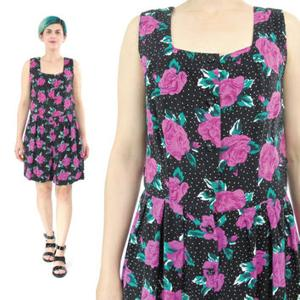

In [138]:
from IPython.core.display import Image, display
file_name="/Users/manishashivshette/Documents/ManishaStudies/CMPE295B/TextureModel/data/val/floral/Floral_Print_Trapeze_Romper/img_00000044.jpg"
display(Image(filename=file_name))

In [139]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
path = file_name
image = load_img(path, target_size=(64,64))

image_arr = img_to_array(image)
image_arr = np.expand_dims(image_arr, axis=0)
print(image_arr.shape)

image_arr /= 255
prediction_array = final_model.predict(image_arr)
print(prediction_array[0][0])
answer = np.argmax(prediction_array[0][0])
print(answer)

(1, 64, 64, 3)
[0.03399495 0.00508756 0.01408347 0.00954965 0.00450803 0.01861349
 0.03922746 0.01185054 0.02138109 0.01810062 0.01489764 0.00434791
 0.00907287 0.01466089 0.01073726 0.00706953 0.00517801 0.05683478
 0.00660023 0.00627752 0.01959543 0.02492534 0.01585797 0.00889663
 0.01317356 0.01559079 0.01043456 0.00812709 0.00539908 0.00541893
 0.0112264  0.00833283 0.01606585 0.011973   0.01332364 0.00626971
 0.01018599 0.01690406 0.00527952 0.00756394 0.00184485 0.02796428
 0.00740039 0.01511161 0.01070107 0.01279835 0.02266022 0.0220953
 0.01101004 0.00442418 0.0083279  0.03370486 0.00913478 0.01320384
 0.02014076 0.01269738 0.01275891 0.02032733 0.00360207 0.01809677
 0.0032949  0.01982712 0.0177765  0.00814193 0.00905264 0.00996175
 0.02124557 0.00855188 0.00867001 0.02556975 0.01925918 0.0140262 ]
17


In [140]:
import heapq
heapq.nlargest(5, range(len(prediction_array[0][0])), prediction_array[0][0].__getitem__)

[17, 6, 0, 51, 41]